In [739]:
import pandas as pd 
import pandas_datareader as web
import numpy as np 
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
plt.style.use('fivethirtyeight')

#csv file used https://drive.google.com/file/d/1yjdLiN_aeNfb5_UaiprxYtwKBFw6qRti/view?usp=sharing

<function matplotlib.pyplot.show(close=None, block=None)>

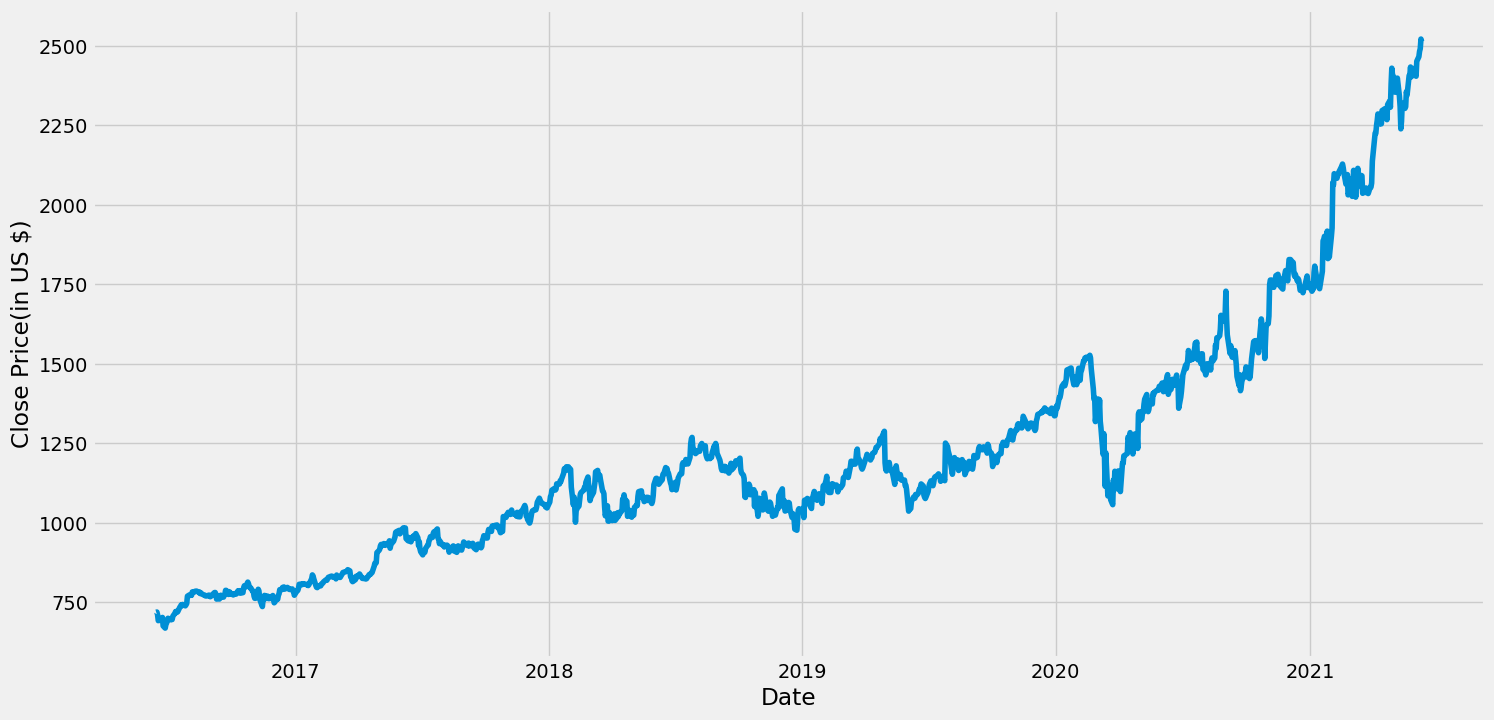

In [646]:
#getting stock 
df_close=pd.read_csv("GOOG.csv")
df_close['date']=df_close['date'].str.slice(0,10)
df_close['date']=pd.to_datetime(df_close['date'])

df_close=df_close.set_index('date')
df_close

#plotting the historic data
plt.figure(figsize=(16,8))
plt.plot(df_close['close'])
plt.xlabel('Date')
plt.ylabel('Close Price(in US $)')
plt.show

In [647]:
#filtering out only close price column 
df_close=df_close.filter(['close'])
# converting this to np array
data=df_close.values

#amount of data to be used for training the model 
training_data_len=math.ceil(len(data)*.8)

#scaling the data and transforming the data 
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)
scaled_data

array([[0.02698372],
       [0.02733443],
       [0.02271575],
       ...,
       [0.98370509],
       [1.        ],
       [0.99586153]])

In [648]:
#creating training data set 
train_data=scaled_data[0:training_data_len,:]

#split the training data 
x_train=[]
y_train=[]

#training the data on first 60 days and then getting the result of 61st day as output 
for i in range(60,training_data_len):
    x_train.append(train_data[i-60:i,0])
    y_train.append(tarin_data[i,0])
    if i<=60:
        print(x_train)# for understanding what type of output we are getting
        print(y_train)


[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,
       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,
       0.00635609, 0.00855213, 0.01286326, 0.01669958, 0.01415283,
       0.0159226 , 0.01462225, 0.0201636 , 0.02526789, 0.02826249,
       0.02628768, 0.02842975, 0.02783623, 0.03535239, 0.03706821,
       0.03935058, 0.03796929, 0.04018691, 0.03858439, 0.03785598,
       0.03966353, 0.04189733, 0.05424261, 0.05644944, 0.05547282,
       0.05661131, 0.05576419, 0.06148899, 0.06124079, 0.0625897 ,
       0.06281632, 0.06290805, 0.06202855, 0.06160769, 0.05874799,
       0.06024259, 0.05894223, 0.05781994, 0.05605555, 0.05601778,
       0.05470124, 0.05457714, 0.05464729, 0.05605555, 0.05440448,
       0.05330377, 0.05423721, 0.05568325, 0.06033432, 0.06048   ])]
[0.05776597925906746]


In [649]:
# converting to np array
x_train,y_train=np.array(x_train),np.array(y_train)

In [650]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [651]:
#building up the model and compiling

model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [652]:
#training the data
model.fit(x_train,y_train,batch_size=32,epochs=50)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0186
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0012
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 8.0278e-04
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 7.1824e-04
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 5.5552e-04
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 4.7952e-04
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 5.0600e-04
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 5.0022e-04
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 5.2244e-04
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 4.2031e-04
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 4.4925e-04
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 4.3923e-04
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 3.6660e-04
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 3.5116e-04
Epoch 15/50
30/30 ━━━━━

In [653]:
# creating the testing data
test_data=scaled_data[training_data_len-60:,:]

#spliting in x test and y test 
x_test=[]
y_test=data[training_data_len:,:]

#filling x_test dataset
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,:])

#converting data to np array reshaping it and 
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
    

In [654]:
#predicting the values and retransforming it 
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

rmse=np.sqrt(np.mean((y_test-predictions)**2))
rmse

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


51.10759462054546

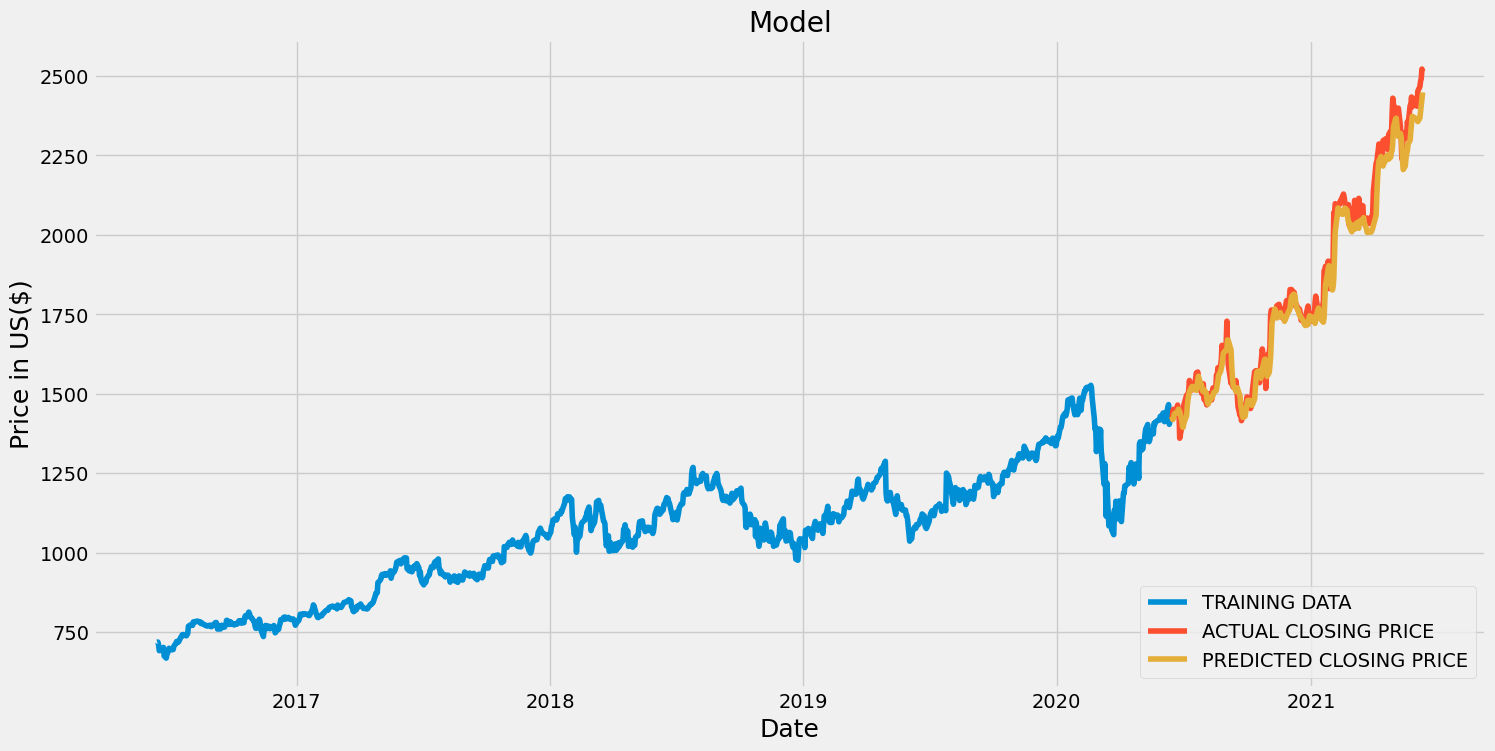

In [694]:
# plotting data
train=pd.DataFrame(data[:training_data_len])
train=train.set_index(df_close.index[:training_data_len])
valid=pd.DataFrame()
valid['Close']=pd.DataFrame(data[training_data_len:])
valid['Predictions']=predictions
valid=valid.set_index(df_close.index[training_data_len:])
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price in US($)',fontsize=18)
plt.plot(train.index,train)
plt.plot(valid.index,valid[ 'Close'])
plt.plot(valid.index,valid[ 'Predictions'])
plt.legend(['TRAINING DATA','ACTUAL CLOSING PRICE','PREDICTED CLOSING PRICE'],loc='lower right')
plt.show()

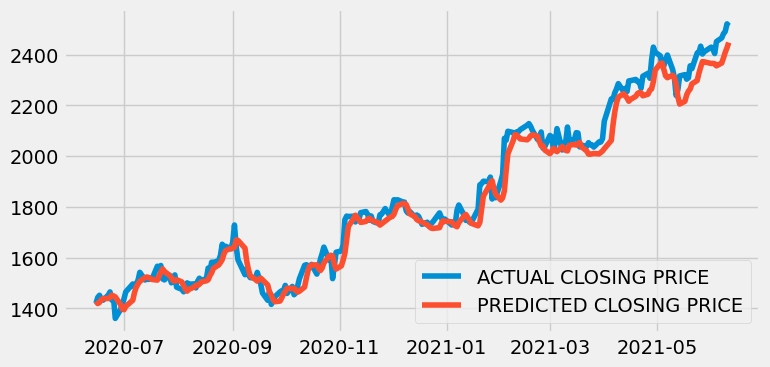

In [696]:
#visualising closed price and predicted price for testing data side by side 
plt.figure(figsize=(8,4))
plt.plot(valid.index,valid[ 'Close'])
plt.plot(valid.index,valid[ 'Predictions'])
plt.legend(['ACTUAL CLOSING PRICE','PREDICTED CLOSING PRICE'],loc='lower right')
plt.show()

In [712]:
#now predicting future price using the above given model
google_future=pd.read_csv('GOOG.csv')
google_future['date']=google_future['date'].str.slice(0,10)
google_future['date']=pd.to_datetime(google_future['date'])
google_future=google_future.set_index('date')
new_df=google_future.filter(['close'])

#last 60 days
last_60=new_df[-60:].values
last_60_scaled=scaler.transform(last_60)
X_test=[]

#append the X_test and converting it to np array and reshaping it 
X_test.append(last_60_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test) #predicting price

#retransforming the scaled value
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
[[2458.1584]]
